# 🛍️ Project Objective: Product Category Classifier for ShopEase E-Commerce

This project aims to automate product categorization for the ShopEase E-Commerce platform using Machine Learning models.  
By leveraging product descriptions and structured attributes like brand, color, material, and price, train models to classify products into predefined categories such as Electronics, Clothing, etc.

We build and compare two deep learning models:  
- 🧠 An **Artificial Neural Network (ANN)**  
- 🔁 A **Long Short-Term Memory (LSTM)** network  

The best-performing model is then evaluated through detailed visualizations.


In [12]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D, LSTM, Dense, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [2]:
# Step 2: Load dataset
df = pd.read_csv("Product Category Classifier for ShopEase E-Commerce.csv")

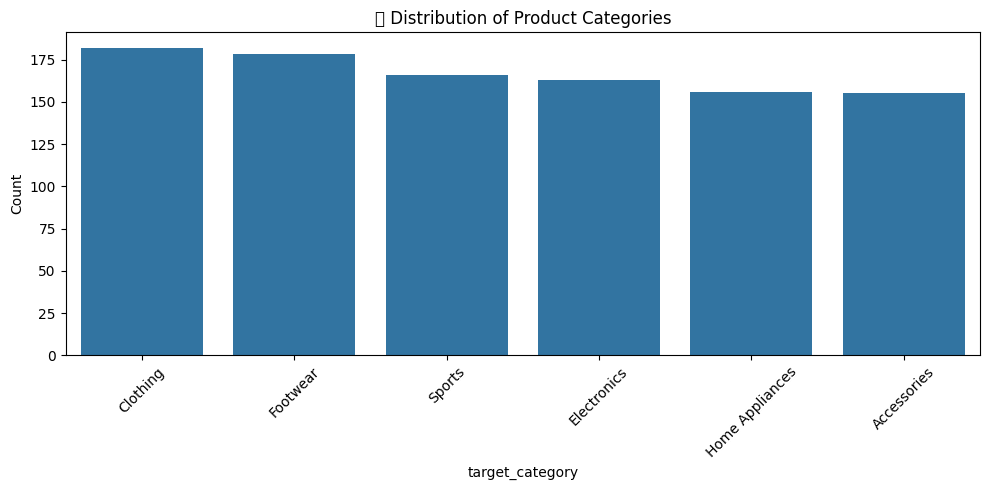

In [3]:
# Step 3:Build Count Plot of Product Target Categories
plt.figure(figsize=(10,5))
sns.countplot(x='target_category', data=df, order=df['target_category'].value_counts().index)
plt.title('📦 Distribution of Product Categories')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

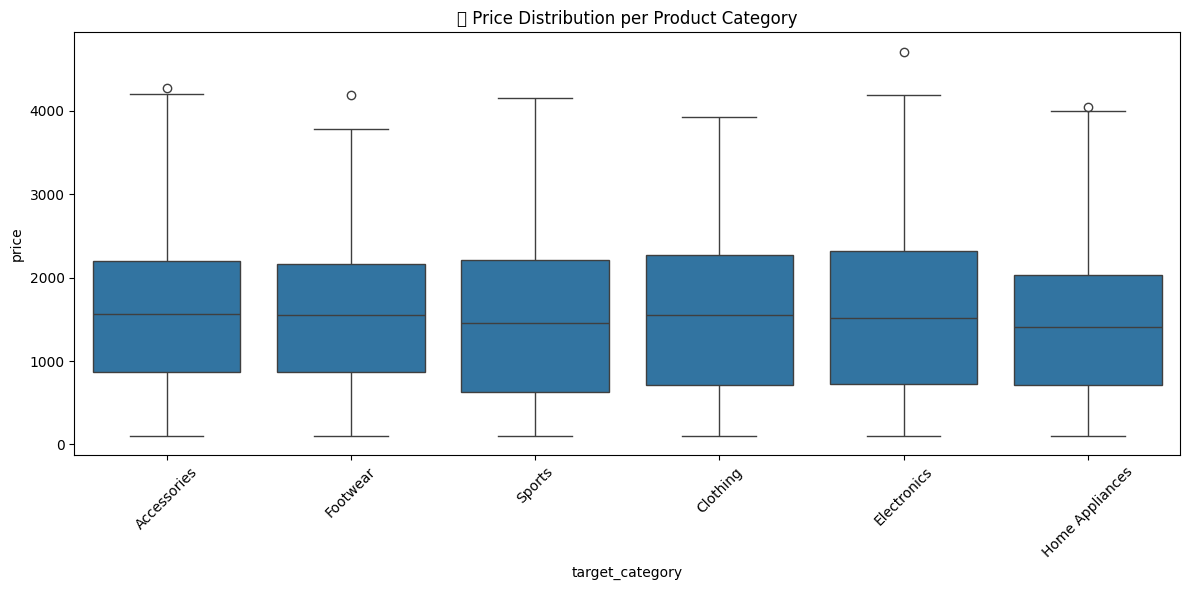

In [5]:
# Step 4:Built Box Plot of Price Distribution per Product Category
plt.figure(figsize=(12,6))
sns.boxplot(x='target_category', y='price', data=df)
plt.title('💰 Price Distribution per Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

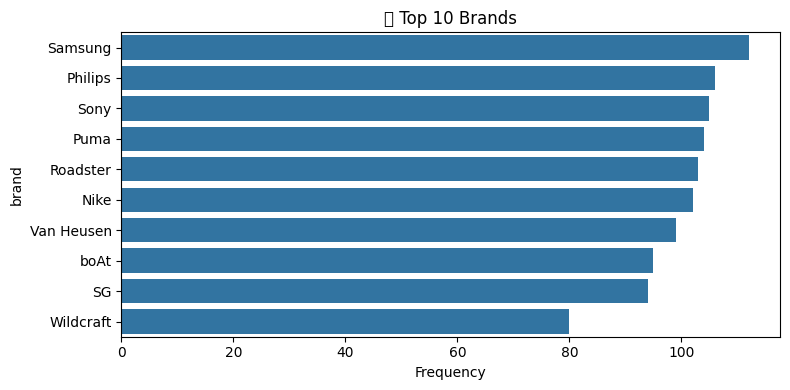

In [6]:
# Step 5:Build Bar Plot of Top 10 Brands by Frequency
top_brands = df['brand'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title('🏷️ Top 10 Brands')
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

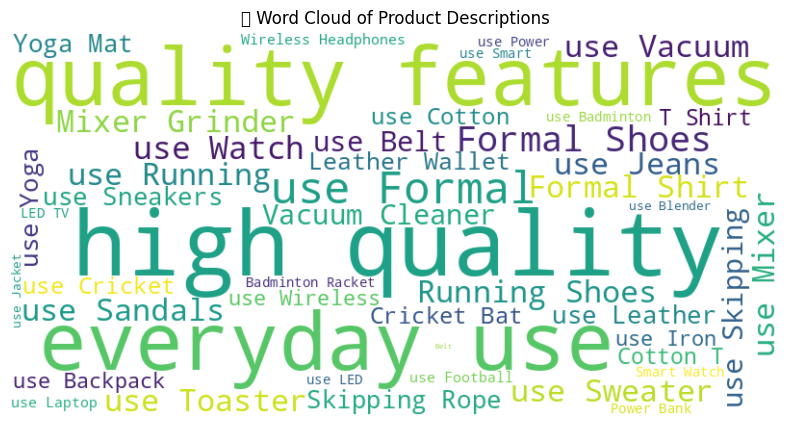

In [7]:
# Step 6: Word Cloud of Product Descriptions
from wordcloud import WordCloud

text_corpus = " ".join(df['description'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("📝 Word Cloud of Product Descriptions")
plt.show()

In [8]:
# Step 7: Fill missing values and create text column
df['size'] = df['size'].fillna('Unknown')
df['text'] = df['description'] + ' ' + df['brand'] + ' ' + df['color'] + ' ' + df['size'] + ' ' + df['material']

In [9]:
# Step 8: Encode the target labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['target_category'])
num_classes = len(label_encoder.classes_)

In [10]:
# Step 9: One-hot encode structured attributes and scale price
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
structured_cat = ohe.fit_transform(df[['brand', 'color', 'material']])
scaler = StandardScaler()
price_scaled = scaler.fit_transform(df[['price']])
structured_input = np.concatenate([price_scaled, structured_cat], axis=1)

In [13]:
# Step 10: One-hot encode the output labels
y = tf.keras.utils.to_categorical(df['label'], num_classes)

In [14]:
# Step 11: Tokenize text for neural network models
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
text_pad = pad_sequences(sequences, maxlen=100, padding='post')

In [15]:
# Step 12: Train-test split
X_text_train, X_text_test, X_struct_train, X_struct_test, y_train, y_test = train_test_split(
    text_pad, structured_input, y, test_size=0.2, random_state=42
)

In [16]:
# Step 13: Build ANN model
input_text_ann = Input(shape=(100,), name='text_input')
x_ann = Embedding(5000, 64)(input_text_ann)
x_ann = GlobalAveragePooling1D()(x_ann)

input_struct_ann = Input(shape=(structured_input.shape[1],), name='struct_input')
s_ann = Dense(64, activation='relu')(input_struct_ann)

merged_ann = Concatenate()([x_ann, s_ann])
z_ann = Dense(64, activation='relu')(merged_ann)
output_ann = Dense(num_classes, activation='softmax')(z_ann)

model_ann = Model([input_text_ann, input_struct_ann], output_ann)
model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Step 14: Train ANN model
model_ann.fit([X_text_train, X_struct_train], y_train, epochs=35, batch_size=32, validation_split=0.2)

Epoch 1/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.1969 - loss: 1.8067 - val_accuracy: 0.1937 - val_loss: 1.7964
Epoch 2/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1953 - loss: 1.7844 - val_accuracy: 0.1562 - val_loss: 1.7963
Epoch 3/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2502 - loss: 1.7544 - val_accuracy: 0.1375 - val_loss: 1.7930
Epoch 4/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3075 - loss: 1.7404 - val_accuracy: 0.1437 - val_loss: 1.7938
Epoch 5/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3010 - loss: 1.7274 - val_accuracy: 0.1625 - val_loss: 1.7936
Epoch 6/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2874 - loss: 1.7235 - val_accuracy: 0.1562 - val_loss: 1.8014
Epoch 7/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3084 - loss: 1.7008 - val_accuracy: 0.1625 - val_loss: 1.7991
Epoch 8/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3630 - loss: 1.6873 - val_accuracy: 0.1688 - val_loss

In [18]:
# Step 15: Build LSTM model
input_text_lstm = Input(shape=(100,), name='text_input')
x_lstm = Embedding(5000, 64)(input_text_lstm)
x_lstm = LSTM(64)(x_lstm)

input_struct_lstm = Input(shape=(structured_input.shape[1],), name='struct_input')
s_lstm = Dense(64, activation='relu')(input_struct_lstm)

merged_lstm = Concatenate()([x_lstm, s_lstm])
z_lstm = Dense(64, activation='relu')(merged_lstm)
output_lstm = Dense(num_classes, activation='softmax')(z_lstm)

model_lstm = Model([input_text_lstm, input_struct_lstm], output_lstm)
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Step 16: Train LSTM model
model_lstm.fit([X_text_train, X_struct_train], y_train, epochs=35, batch_size=32, validation_split=0.2)

Epoch 1/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.1841 - loss: 1.8030 - val_accuracy: 0.2125 - val_loss: 1.7793
Epoch 2/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2100 - loss: 1.7759 - val_accuracy: 0.1750 - val_loss: 1.7838
Epoch 3/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2511 - loss: 1.7646 - val_accuracy: 0.1688 - val_loss: 1.7827
Epoch 4/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2724 - loss: 1.7460 - val_accuracy: 0.1875 - val_loss: 1.7830
Epoch 5/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2808 - loss: 1.7362 - val_accuracy: 0.1500 - val_loss: 1.7875
Epoch 6/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3056 - loss: 1.7215 - val_accuracy: 0.1625 - val_loss: 1.7896
Epoch 7/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3515 - loss: 1.7043 - val_accuracy: 0.1375 - val_loss: 1.7973
Epoch 8/35
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3430 - loss: 1.6880 - val_accuracy: 0.1875 - v

In [20]:
# Step 17: Model performance evaluation
y_pred_ann = model_ann.predict([X_text_test, X_struct_test])
y_pred_lstm = model_lstm.predict([X_text_test, X_struct_test])

acc_ann = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred_ann, axis=1))
acc_lstm = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred_lstm, axis=1))

print("🔍 Model Accuracy Comparison")
print(f"ANN Accuracy : {acc_ann * 100:.2f}%")
print(f"LSTM Accuracy: {acc_lstm * 100:.2f}%")

best_model = max([("ANN", acc_ann), ("LSTM", acc_lstm)], key=lambda x: x[1])
print(f"🏆 Best Model: {best_model[0]} with {best_model[1]*100:.2f}% accuracy")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
🔍 Model Accuracy Comparison
ANN Accuracy : 70.50%
LSTM Accuracy: 16.00%
🏆 Best Model: ANN with 70.50% accuracy


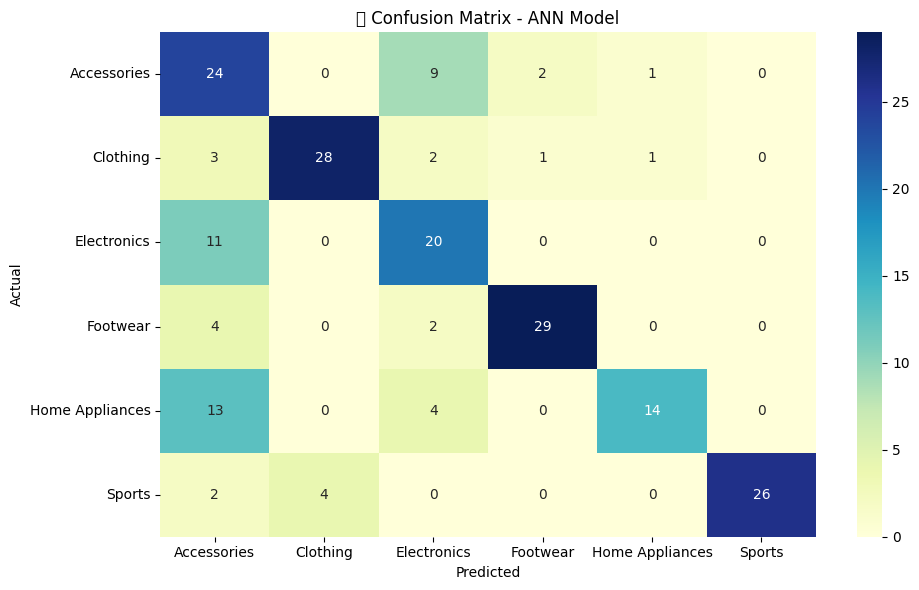

In [21]:
# Step 18: Confusion Matrix
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred_ann, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('📊 Confusion Matrix - ANN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

📌 Conclusion: Confusion matrix shows where the model performs well and where it confuses between classes.

In [22]:
# Step 19: Classification Report
print("📄 Classification Report - ANN Model:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

📄 Classification Report - ANN Model:
                 precision    recall  f1-score   support

    Accessories       0.42      0.67      0.52        36
       Clothing       0.88      0.80      0.84        35
    Electronics       0.54      0.65      0.59        31
       Footwear       0.91      0.83      0.87        35
Home Appliances       0.88      0.45      0.60        31
         Sports       1.00      0.81      0.90        32

       accuracy                           0.70       200
      macro avg       0.77      0.70      0.72       200
   weighted avg       0.77      0.70      0.72       200



📌 Conclusion: Shows precision, recall, and F1-score for each category.

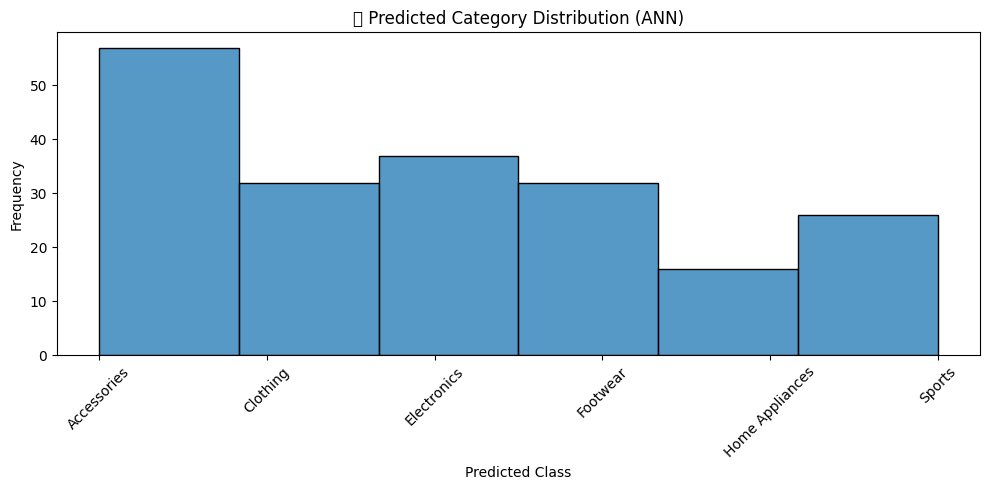

In [23]:
# Step 20: Distribution of Predictions
plt.figure(figsize=(10, 5))
sns.histplot(y_pred, bins=len(label_encoder.classes_), kde=False)
plt.title("🔢 Predicted Category Distribution (ANN)")
plt.xlabel("Predicted Class")
plt.ylabel("Frequency")
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.tight_layout()
plt.show()

📌 Conclusion: Helps detect if any category is over/under-predicted by the model.

# 📌 Project Summary

In this project:
- Performed exploratory data analysis to understand data distribution
- Preprocessed text and structured features
- Built and trained ANN and LSTM models for multiclass classification
- Compared model performance and evaluated predictions visually

🏆 **Conclusion**: The ANN model achieved the highest accuracy and shows balanced performance across categories.  
It is suitable for integration into ShopEase’s automated product categorization system.
